In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('infy_df.csv')
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794920,0.796680,0.791020,0.796680,-0.000436,204800.0
1,1996-01-02,0.794920,0.798830,0.793460,0.793460,-0.000435,204800.0
2,1996-01-03,0.798830,0.798830,0.798830,0.798830,-0.000437,102400.0
3,1996-01-04,0.791020,0.794920,0.791020,0.793550,-0.000435,307200.0
4,1996-01-05,0.784180,0.784180,0.784180,0.784180,-0.000429,51200.0
...,...,...,...,...,...,...,...
6300,2020-12-28,1238.449951,1248.000000,1236.000000,1240.300049,1240.300049,4607051.0
6301,2020-12-29,1235.000000,1254.449951,1235.000000,1250.300049,1250.300049,6878105.0
6302,2020-12-30,1253.000000,1253.300049,1238.150024,1246.800049,1246.800049,5194690.0
6303,2020-12-31,1243.000000,1258.400024,1239.000000,1255.800049,1255.800049,7430470.0


In [3]:
df.head

<bound method NDFrame.head of             Date         Open         High          Low        Close  \
0     1996-01-01     0.794920     0.796680     0.791020     0.796680   
1     1996-01-02     0.794920     0.798830     0.793460     0.793460   
2     1996-01-03     0.798830     0.798830     0.798830     0.798830   
3     1996-01-04     0.791020     0.794920     0.791020     0.793550   
4     1996-01-05     0.784180     0.784180     0.784180     0.784180   
...          ...          ...          ...          ...          ...   
6300  2020-12-28  1238.449951  1248.000000  1236.000000  1240.300049   
6301  2020-12-29  1235.000000  1254.449951  1235.000000  1250.300049   
6302  2020-12-30  1253.000000  1253.300049  1238.150024  1246.800049   
6303  2020-12-31  1243.000000  1258.400024  1239.000000  1255.800049   
6304  2021-01-01  1257.900024  1265.500000  1255.800049  1260.449951   

        Adj Close     Volume  
0       -0.000436   204800.0  
1       -0.000435   204800.0  
2       -0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6175 entries, 0 to 6304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6175 non-null   object 
 1   Open       6175 non-null   float64
 2   High       6175 non-null   float64
 3   Low        6175 non-null   float64
 4   Close      6175 non-null   float64
 5   Adj Close  6175 non-null   float64
 6   Volume     6175 non-null   float64
dtypes: float64(6), object(1)
memory usage: 385.9+ KB


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(-1000.0, 0, '2016-12-14'),
  Text(0.0, 0, '1996-01-01'),
  Text(1000.0, 0, '2000-01-24'),
  Text(2000.0, 0, '2004-01-22'),
  Text(3000.0, 0, '2008-01-29'),
  Text(4000.0, 0, '2012-03-01'),
  Text(5000.0, 0, '2016-03-29'),
  Text(6000.0, 0, '2020-04-24'),
  Text(7000.0, 0, '')])

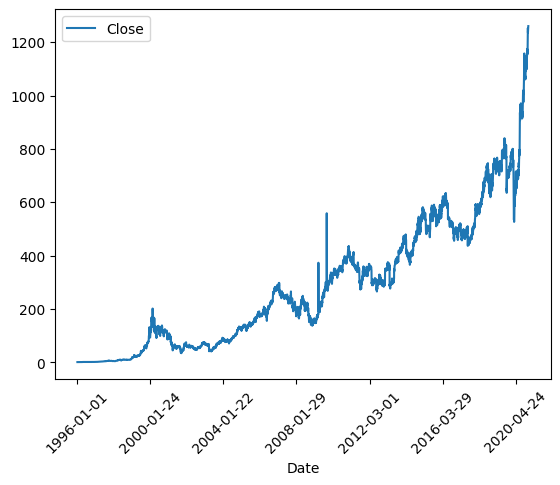

In [5]:
df.plot(x='Date',y='Close')
plt.xticks(rotation=45)

In [6]:
model = RandomForestRegressor()

In [7]:
#Train the model
X_train = df[['Open','High','Low','Volume']]
X_train = X_train[:int(len(df)-1)]
y_train= df['Close']
y_train = y_train[:int(len(df)-1)]
model.fit(X_train,y_train)  #Training the model

RandomForestRegressor()

In [8]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score, r2_score

In [9]:
print('The training r square is: %.2f',model.score(X_train,y_train))

The training r square is: %.2f 0.9999755263728746


In [10]:
#Test the model
y_test = model.predict(X_train)
print('The model score is:',model.score(X_train,y_train))

The model score is: 0.9999755263728746


In [11]:
#Make the predictions
new_data = df[['Open','High','Low','Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or day to be:',prediction)
print('Actual value is:',df[['Close']].tail(1).values[0][0])

The model predicts the last row or day to be: [1249.74704851]
Actual value is: 1260.449951


In [12]:
X = df[['Open','High','Low','Volume']]
X = X[:int(len(df)-1)]
X.head()

,Open,High,Low,Volume
0,0.79492,0.79668,0.79102,204800.0
1,0.79492,0.79883,0.79346,204800.0
2,0.79883,0.79883,0.79883,102400.0
3,0.79102,0.79492,0.79102,307200.0
4,0.78418,0.78418,0.78418,51200.0


In [13]:
predictions = model.predict(X)
print(predictions)

[7.95500200e-01 7.94516800e-01 7.97111200e-01 ... 1.24929205e+03
 1.24707455e+03 1.25265205e+03]
